Question of Interest
How are the Covid-19 cases |related to the density of the population and healthcare industry across the countries?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:


file_path = "/Users/manikantarena/Downloads/owid-covid-data.csv"
df = pd.read_csv(file_path)  # Use read_csv() instead of read_excel()

# Check the first few rows
print(df.head())



  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [35]:
# Check the first few rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [36]:
# Check column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [37]:
# Summary of data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [38]:
# Statistical summary of numerical columns
print(df.describe())


        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%       

Handling Missing Values

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Option 1: Fill missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Option 2: Drop columns with excessive missing data (e.g., more than 50% missing)
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)


continent                                   26525
total_cases                                 17631
new_cases                                   19276
new_cases_smoothed                          20506
total_deaths                                17631
                                            ...  
human_development_index                    110308
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 63, dtype: int64


/var/folders/8q/688r2fr579xf5rt1c5p4c46c0000gn/T/ipykernel_25022/4136604448.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Check for Duplicates

In [40]:
# Find duplicate rows
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


0


Data Visualization and Trends

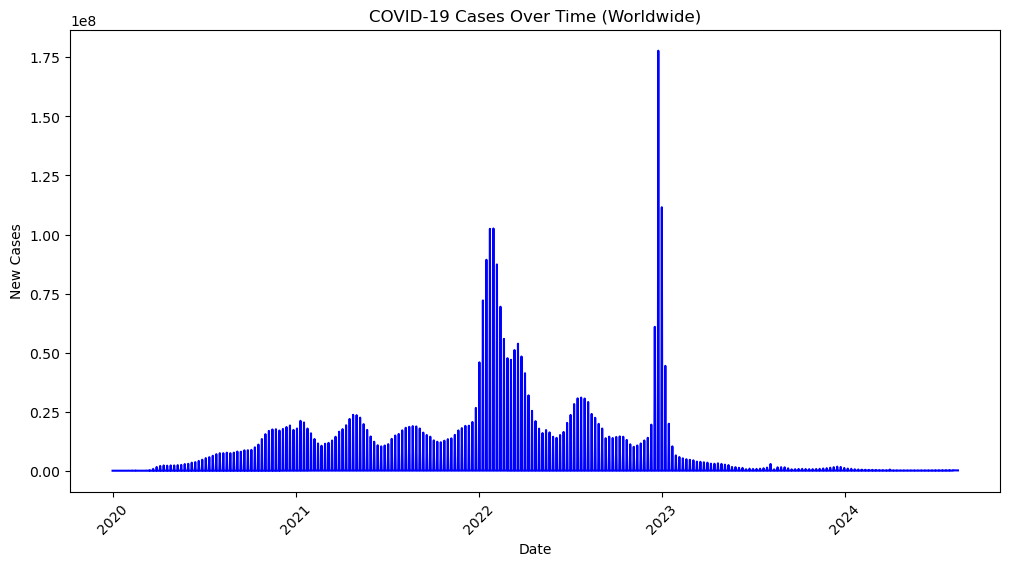

In [41]:
#1 Covid-19 cases over time
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby('date')['new_cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, color='blue')
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases Over Time (Worldwide)")
plt.xticks(rotation=45)
plt.show()


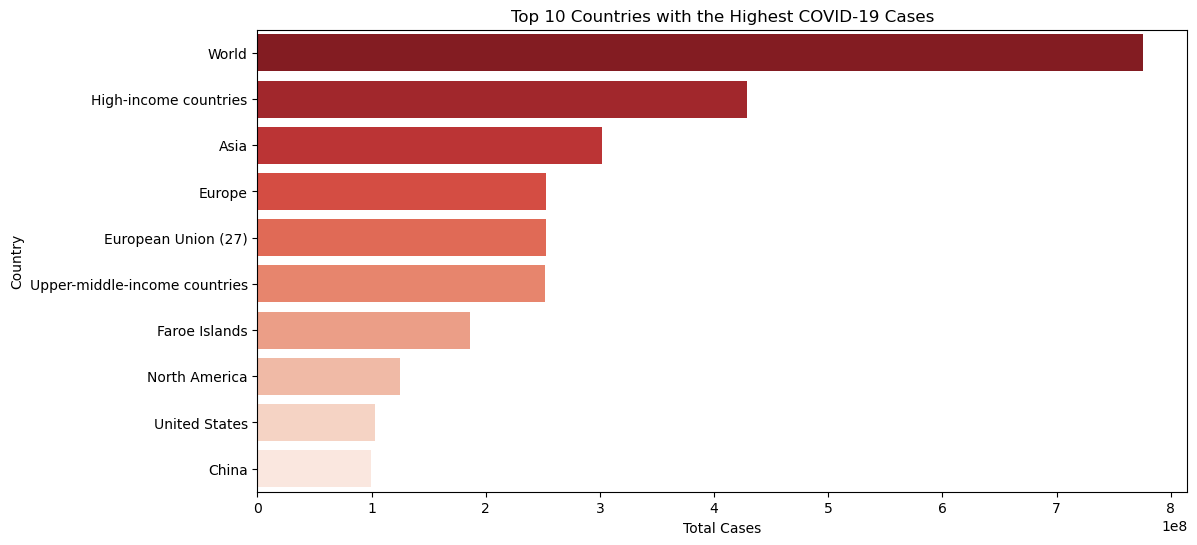

In [42]:
#2 Top 10 countries with highest cases
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest COVID-19 Cases")
plt.show()


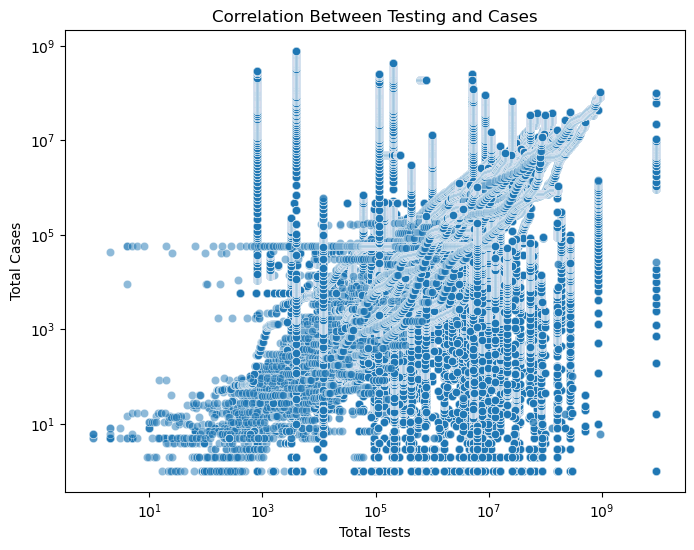

In [43]:
#3 Relation between Testing and Cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_tests'], y=df['total_cases'], alpha=0.5)
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.title("Correlation Between Testing and Cases")
plt.xscale('log')
plt.yscale('log')
plt.show()


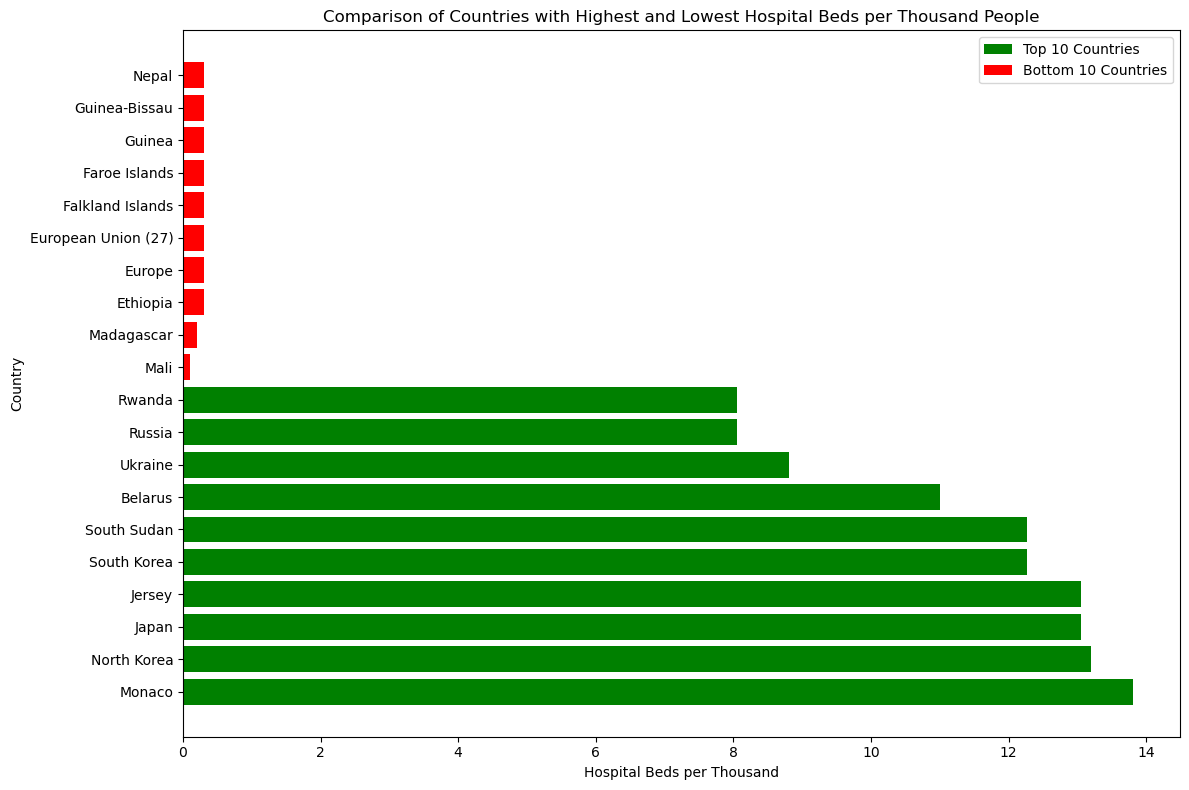

In [44]:
#4 Countries with highest and lowest hospital beds per 1000 people
# Sort the hospital beds per thousand data in descending and ascending order
top_10_hospital_beds = hospital_beds.nlargest(10)
bottom_10_hospital_beds = hospital_beds.nsmallest(10)

# Plot the data
plt.figure(figsize=(12, 8))

# Plotting top 10 countries with highest hospital beds
plt.barh(top_10_hospital_beds.index, top_10_hospital_beds.values, color='green', label='Top 10 Countries')
# Plotting bottom 10 countries with lowest hospital beds
plt.barh(bottom_10_hospital_beds.index, bottom_10_hospital_beds.values, color='red', label='Bottom 10 Countries')

# Adding labels and title
plt.xlabel("Hospital Beds per Thousand")
plt.ylabel("Country")
plt.title("Comparison of Countries with Highest and Lowest Hospital Beds per Thousand People")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



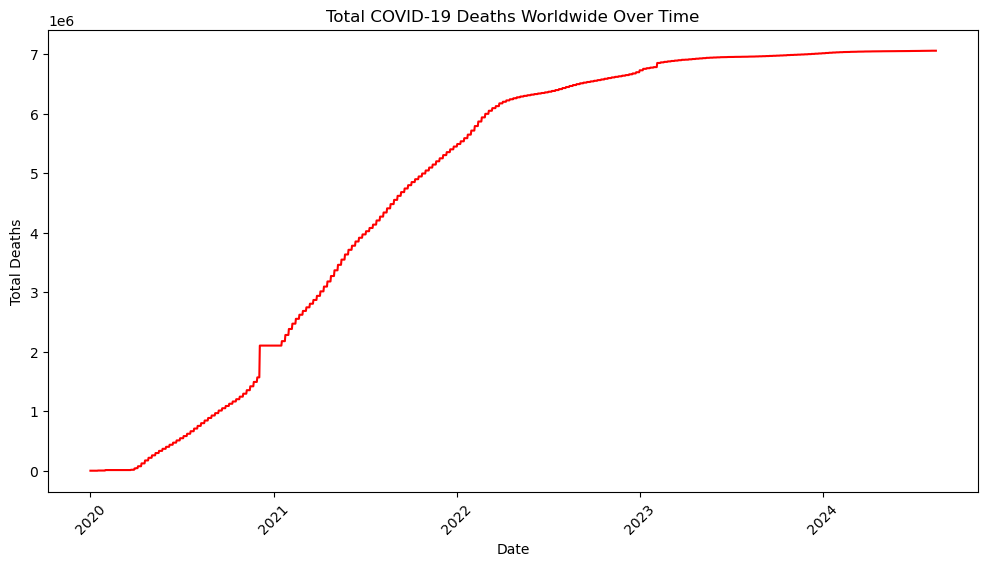

In [45]:
# Group by date and calculate the total deaths over time
df_total_deaths = df.groupby('date')['total_deaths'].max()

plt.figure(figsize=(12, 6))
plt.plot(df_total_deaths.index, df_total_deaths.values, color='red')
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths Worldwide Over Time")
plt.xticks(rotation=45)
plt.show()


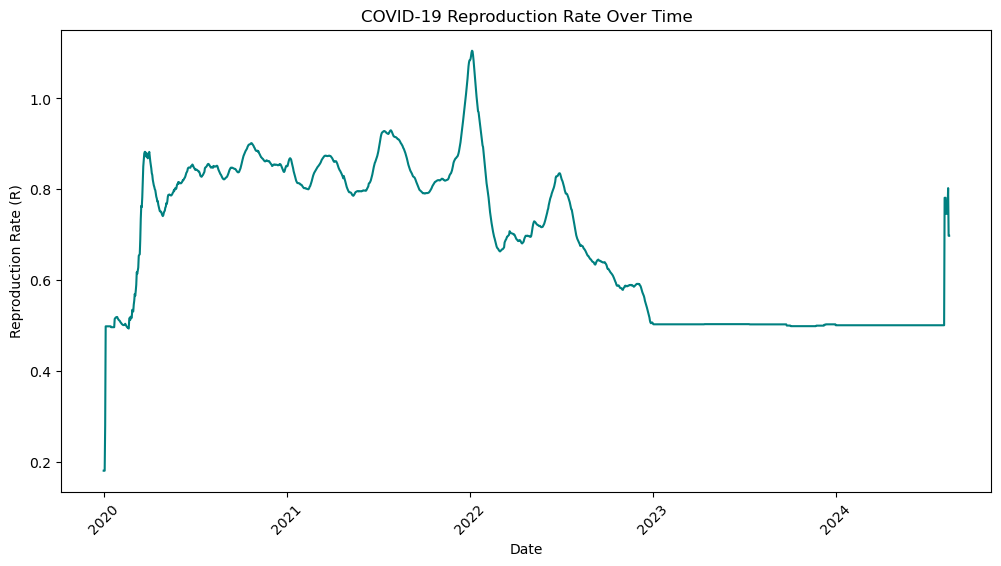

In [46]:
# Plotting the COVID-19 reproduction rate (R) over time
df_reproduction_rate = df.groupby('date')['reproduction_rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_reproduction_rate.index, df_reproduction_rate.values, color='teal')
plt.xlabel("Date")
plt.ylabel("Reproduction Rate (R)")
plt.title("COVID-19 Reproduction Rate Over Time")
plt.xticks(rotation=45)
plt.show()


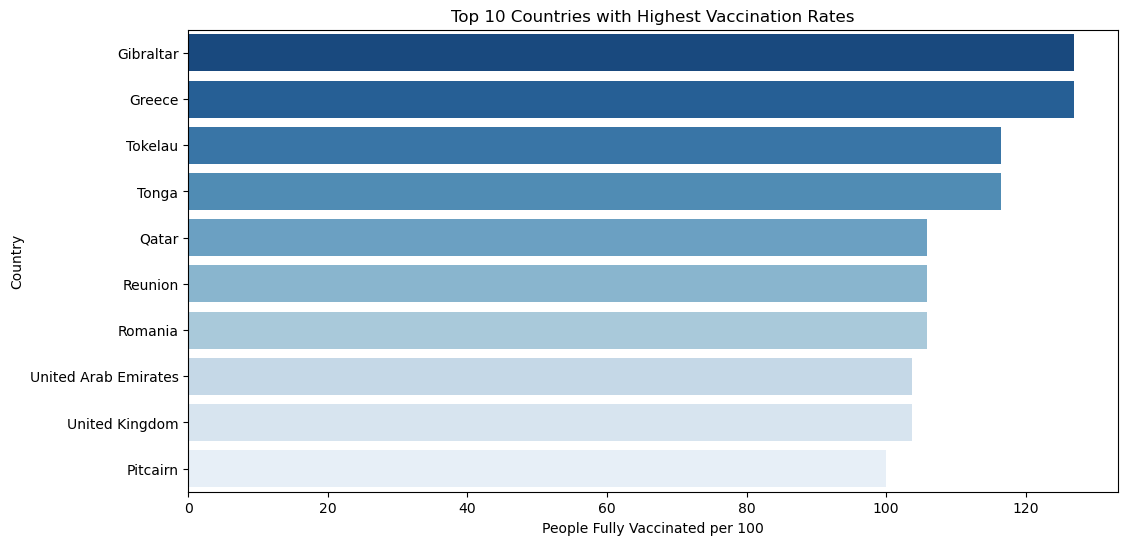

In [47]:
vaccination_rate = df.groupby("location")["people_fully_vaccinated_per_hundred"].max().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=vaccination_rate.values, y=vaccination_rate.index, palette="Blues_r")
plt.xlabel("People Fully Vaccinated per 100")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Vaccination Rates")
plt.show()


Classification- Random Forest

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "/Users/manikantarena/Downloads/owid-covid-data.csv"
df = pd.read_csv(file_path)

# Select relevant features
df = df[['location', 'total_cases_per_million', 'total_deaths_per_million', 'hospital_beds_per_thousand', 'gdp_per_capita', 'human_development_index']]
df = df.dropna()  # Drop missing values

# Create classification target (High vs. Low COVID-19 cases)
median_cases = df['total_cases_per_million'].median()
df['covid_severity'] = np.where(df['total_cases_per_million'] > median_cases, 'High', 'Low')

# Encode target variable
le = LabelEncoder()
df['covid_severity'] = le.fit_transform(df['covid_severity'])  # High = 1, Low = 0

# Define features and target
X = df.drop(columns=['location', 'total_cases_per_million', 'covid_severity'])
y = df['covid_severity']

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27496
           1       1.00      1.00      1.00     27746

    accuracy                           1.00     55242
   macro avg       1.00      1.00      1.00     55242
weighted avg       1.00      1.00      1.00     55242



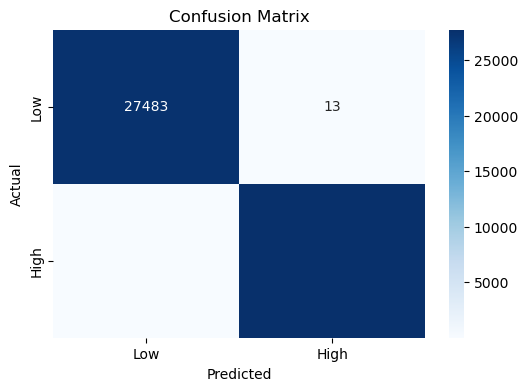

In [49]:
# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Regression Model - Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant features
df_reg = df[['total_cases_per_million', 'hospital_beds_per_thousand', 'gdp_per_capita', 'human_development_index', 'total_deaths_per_million']]
df_reg = df_reg.dropna()  # Drop missing values

# Define features and target
X_reg = df_reg.drop(columns=['total_deaths_per_million'])
y_reg = df_reg['total_deaths_per_million']

# Split data into train & test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale numerical features
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


R² Score: 0.42
RMSE: 931.26


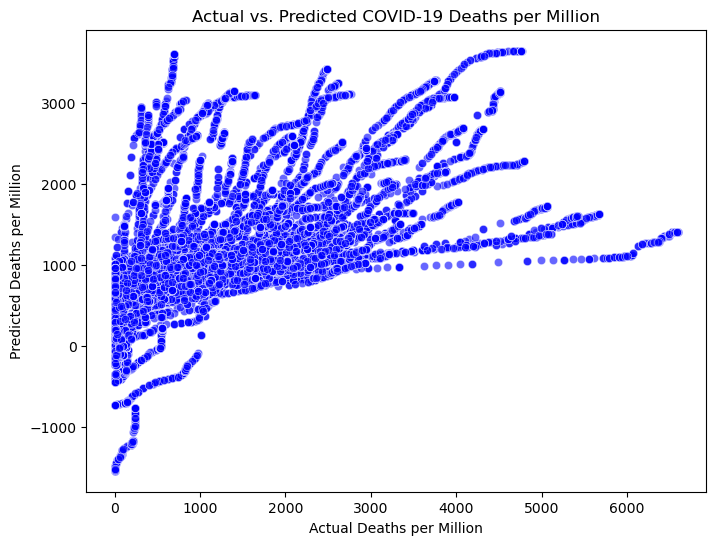

In [51]:
# Train model
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

# Evaluate model
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

print(f'R² Score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

# Plot actual vs predicted deaths per million
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, color='blue', alpha=0.6)
plt.xlabel("Actual Deaths per Million")
plt.ylabel("Predicted Deaths per Million")
plt.title("Actual vs. Predicted COVID-19 Deaths per Million")
plt.show()


Data Preparation